In [1]:
# Import libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import itertools

# Set the color palette
sns.set_palette("colorblind")

In [2]:
# Set where the datasets are
path_data = "datasets/use/15mins/"

# Function to log a message with datetime
def log_message(message):
    """Log messages with datetime in the console

    Args:
        message (str): Message to be show
    """
    print("["+datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+"] "+message)

In [3]:
# Read the csv file containing the information
# For Austin data
df_austin = pd.read_csv(path_data+"15minute_data_austin/15minute_data_austin.csv")

# For California data
df_california = pd.read_csv(path_data+"15minute_data_california/15minute_data_california.csv")
log_message("California dataframe created")

# For New York data
df_newyork = pd.read_csv(path_data+"15minute_data_newyork/15minute_data_newyork.csv")
log_message("New York dataframe created")

log_message("Austin dataframe created")

[2021-12-11 16:59:23] Austin dataframe created


In [4]:
# List of columns to consider
columns_general = [
    "dataid",
    "local_15min",
    'air1', 
    'bathroom1', 
    'car1', 
    'car2',
    'clotheswasher1', 
    'clotheswasher_dryg1', 
    'diningroom1',
    'dishwasher1', 
    'disposal1', 
    'drye1', 
    'dryg1', 
    'freezer1',
    'kitchen1',
    'kitchen2', 
    'kitchenapp1', 
    'kitchenapp2', 
    'lights_plugs1',
    'lights_plugs2', 
    'lights_plugs3', 
    'lights_plugs4', 
    'microwave1', 
    'oven1', 
    'refrigerator1', 
    'solar', 
    'solar2', 
    'waterheater1',
    "livingroom1",
]

# List of columns per appliance
columns_look = [
    'air1', 
    'bathroom1', 
    'car1', 
    'car2',
    'clotheswasher1', 
    'clotheswasher_dryg1', 
    'diningroom1',
    'dishwasher1', 
    'disposal1', 
    'drye1', 
    'dryg1', 
    'freezer1',
    'kitchen1',
    'kitchen2', 
    'kitchenapp1', 
    'kitchenapp2', 
    'lights_plugs1',
    'lights_plugs2', 
    'lights_plugs3', 
    'lights_plugs4', 
    'microwave1', 
    'oven1', 
    'refrigerator1', 
    'solar', 
    'solar2', 
    'waterheater1',
    "livingroom1",
]

In [5]:
def evaluate_dataframe(dataframe):
    """To evaluate how much data a dataframe has

    Args:
        dataframe (DataFrame): Pandas Dataframe to be checked
    """
    # Number of houses
    count_houses = dataframe["dataid"].nunique()
    log_message("Houses: "+str(count_houses))
    # Number of rows per house
    group_houses = dataframe.groupby("dataid").size()
    diff_houses_group = group_houses.max() -  group_houses.min()
    log_message("Max registers: "+str(group_houses.max()))
    log_message("Min registers: "+str(group_houses.min()))
    log_message("Diff: "+str(diff_houses_group))
    group_houses.plot.bar()
    plt.show()
    # Max and min datime per house
    group_houses_time = pd.merge(dataframe.groupby("dataid")["local_15min"].min().to_frame(), dataframe.groupby("dataid")["local_15min"].max().to_frame(),on="dataid")
    print(group_houses_time)

In [6]:
# Get the house id per appliance
def get_dict_by_appliance(dataframe, columns_):
    """Get the house id per appliance

    Args:
        dataframe (DataFrame): Pandas Dataframe to use
        columns_ (list): List of appliances to check

    Returns:
        dict: Dictionary with the information of appliance and houses id
    """
    # Dictionary, key = appliance - value = list of house ids
    appliances_housesid = {}
    # Iterate over the columns list
    for appliance in columns_:
        # Get those rows where the column is not NaN
        if appliance in dataframe.columns:
            #print(appliance)
            sub_df = dataframe[dataframe[appliance].notnull()]
            # Remove duplicates values
            list_dataid = list(set(sub_df.dataid))
            # Add pair to dictionary
            appliances_housesid[appliance] = list_dataid
    return appliances_housesid

In [7]:
# Select columns from dataframe
df_austin_work = df_austin[columns_general]
df_california_work = df_california[columns_general]
df_newyork_work = df_newyork[columns_general]

[2021-12-11 16:59:23] Houses: 25
[2021-12-11 16:59:23] Max registers: 35036
[2021-12-11 16:59:23] Min registers: 34468
[2021-12-11 16:59:23] Diff: 568


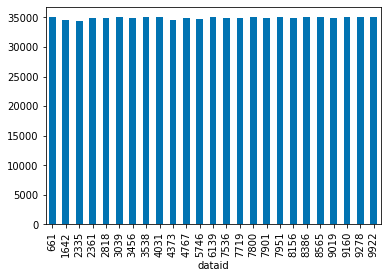

                 local_15min_x           local_15min_y
dataid                                                
661     2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
1642    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
2335    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
2361    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
2818    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
3039    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
3456    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
3538    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
4031    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
4373    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
4767    2018-01-01 00:00:00-06  2018-12-31 04:45:00-06
5746    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
6139    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
7536    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
7719    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
7800    2018-01-01 00:00:00-06  2018-12-31 23:45:00-06
7901    20

In [8]:
evaluate_dataframe(df_austin_work)
log_message("Done Evaluating Austin")
print("*"*50)

In [9]:
# Check max date
df_austin_work['local_15min'].max()

'2018-12-31 23:45:00-06'

In [10]:
# Read the files to be used
path_files = "datasets/use/"
path_appliances = path_files+"appliances.csv"
path_data = path_files+"15mins/15minute_data_austin/15minute_data_austin.csv"
path_weather = path_files+"weather_austin_2018.csv"

# Get the dataframe with the information needed
city = 'Austin'
df_city = pd.read_csv(path_data)
df_appliances = pd.read_csv(path_appliances)
# Get the list of appliances to use
list_appliances = list(df_appliances[city])
list_appliances = [app for app in list_appliances if str(app) !='nan']
print(list_appliances)
# Filter the columns
df_city = df_city[["dataid", "local_15min"]+list_appliances]


# Set the datetime information
df_city['dateTime'] = pd.to_datetime(df_city['local_15min'], utc=True).dt.tz_convert('US/Central')
df_city['year'] = pd.DatetimeIndex(df_city['dateTime']).year
df_city['month'] = pd.DatetimeIndex(df_city['dateTime']).month
df_city['day'] = pd.DatetimeIndex(df_city['dateTime']).day
df_city['hour'] = pd.DatetimeIndex(df_city['dateTime']).hour
df_city['minute'] = pd.DatetimeIndex(df_city['dateTime']).minute

df_city

['bathroom1', 'clotheswasher1', 'dishwasher1', 'drye1', 'microwave1', 'oven1', 'refrigerator1', 'kitchenapp1', 'solar']


,dataid,local_15min,bathroom1,clotheswasher1,dishwasher1,drye1,microwave1,oven1,refrigerator1,kitchenapp1,solar,dateTime,year,month,day,hour,minute
0,661,2018-11-21 15:15:00-06,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.276,2018-11-21 15:15:00-06:00,2018,11,21,15,15
1,661,2018-11-21 15:30:00-06,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.167,2018-11-21 15:30:00-06:00,2018,11,21,15,30
2,661,2018-11-21 15:45:00-06,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.179,2018-11-21 15:45:00-06:00,2018,11,21,15,45
3,661,2018-11-21 16:00:00-06,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.076,2018-11-21 16:00:00-06:00,2018,11,21,16,0
4,661,2018-11-21 16:15:00-06,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.064,2018-11-21 16:15:00-06:00,2018,11,21,16,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873281,9278,2018-12-31 22:45:00-06,NaN,0.000,0.000,0.616,0.003,0.000,0.012,0.080,-0.004,2018-12-31 22:45:00-06:00,2018,12,31,22,45
873282,9278,2018-12-31 23:00:00-06,NaN,0.000,0.000,0.001,0.004,-0.001,0.124,0.016,-0.003,2018-12-31 23:00:00-06:00,2018,12,31,23,0
873283,9278,2018-12-31 23:15:00-06,NaN,0.000,0.000,0.001,0.004,-0.001,0.141,0.003,-0.003,2018-12-31 23:15:00-06:00,2018,12,31,23,15
873284,9278,2018-12-31 23:30:00-06,NaN,0.000,0.000,0.001,0.004,-0.001,0.156,0.005,-0.003,2018-12-31 23:30:00-06:00,2018,12,31,23,30


In [11]:
# Date range
start_date = datetime.date(2018, 1, 1)
end_date = datetime.date(2019, 1, 1)
# Generate list of dates
list_dates = pd.date_range(start_date,end_date - datetime.timedelta(days=1), freq='d')
# Expand the months in list
expand_months_summer = list(itertools.chain(*[[m]*24 for m in list_dates]))
# Create a dataframe with the expanded list
months_summer_df = pd.DataFrame({"date": expand_months_summer})
months_summer_df['month'] = months_summer_df['date'].dt.month
months_summer_df['day'] = months_summer_df['date'].dt.day
months_summer_df

,date,month,day
0,2018-01-01,1,1
1,2018-01-01,1,1
2,2018-01-01,1,1
3,2018-01-01,1,1
4,2018-01-01,1,1
...,...,...,...
8755,2018-12-31,12,31
8756,2018-12-31,12,31
8757,2018-12-31,12,31
8758,2018-12-31,12,31


In [12]:
# To check prices file
path_price = path_files+"AustinPrices.csv"
# Read the file of prices
df_prices = pd.read_csv(path_price)
# Months per season
moths_summer = [6, 7, 8, 9]
moths_no_summer = [1, 2, 3, 4, 5, 10, 11, 12]

# Date range
start_date = datetime.date(2018, 1, 1)
end_date = datetime.date(2019, 1, 1)
# Generate list of dates
list_dates = pd.date_range(start_date,end_date - datetime.timedelta(days=1), freq='d')
# Expand the months in list
expand_months_summer = list(itertools.chain(*[[m]*24 for m in list_dates]))
# Create a dataframe with the expanded list
months_summer_df = pd.DataFrame({"date": expand_months_summer})
months_summer_df['month'] = months_summer_df['date'].dt.month
months_summer_df['day'] = months_summer_df['date'].dt.day

# Add the season column
df_prices_summer_ = df_prices[df_prices["Season"] == "Summer"]
# Filter the summer data
months_summer_df["type"] = "Summer"
# Merge to expand
df_price_summer = pd.merge(
    df_prices_summer_, 
    months_summer_df,  
    how='right', 
    left_on=['Season'], 
    right_on = ['type']
)

# Expand the months in list
# expand_months_no_summer = list(itertools.chain(*[[m]*24 for m in moths_no_summer]))
expand_months_no_summer = list(itertools.chain(*[[m]*24 for m in list_dates]))
# Create a dataframe with the expanded list
months_no_summer_df = pd.DataFrame({"date": expand_months_no_summer})
months_no_summer_df['month'] = months_no_summer_df['date'].dt.month
months_no_summer_df['day'] = months_no_summer_df['date'].dt.day

# Add the season column
df_prices_no_summer_ = df_prices[df_prices["Season"] == "Non-Summer"]
# Filter the non-summer data
months_no_summer_df["type"] = "Non-Summer"
# Merge to expand
df_price_no_summer = pd.merge(
    df_prices_no_summer_, 
    months_no_summer_df,  
    how='right', 
    left_on=['Season'], 
    right_on = ['type']
)

# Merge both dataframes
df_prices = df_price_summer.append(df_price_no_summer)
df_prices
# ['Price', 'Type', 'DayType', 'Season']

,City,Hour,Type,DayType,Season,Price,date,month,day,type
0,Austin,0,Off-peak,Weekdays,Summer,0.03025,2018-01-01,1,1,Summer
1,Austin,1,Off-peak,Weekdays,Summer,0.03025,2018-01-01,1,1,Summer
2,Austin,2,Off-peak,Weekdays,Summer,0.03025,2018-01-01,1,1,Summer
3,Austin,3,Off-peak,Weekdays,Summer,0.03025,2018-01-01,1,1,Summer
4,Austin,4,Off-peak,Weekdays,Summer,0.03025,2018-01-01,1,1,Summer
...,...,...,...,...,...,...,...,...,...,...
420475,Austin,19,Off-peak,Weekends,Non-Summer,0.02982,2018-12-31,12,31,Non-Summer
420476,Austin,20,Off-peak,Weekends,Non-Summer,0.02982,2018-12-31,12,31,Non-Summer
420477,Austin,21,Off-peak,Weekends,Non-Summer,0.02982,2018-12-31,12,31,Non-Summer
420478,Austin,22,Off-peak,Weekends,Non-Summer,0.02982,2018-12-31,12,31,Non-Summer


In [13]:
# Get the houses id per dataframe
austin_appliances_housesid = get_dict_by_appliance(df_austin_work, columns_look)
california_appliances_housesid = get_dict_by_appliance(df_california_work, columns_look)
newyork_appliances_housesid = get_dict_by_appliance(df_newyork_work, columns_look)

In [14]:
# Create a dictionary that unify the information from the others
dict_compare_appliances = {}
for key,value in austin_appliances_housesid.items():
    if key in dict_compare_appliances:
        dict_compare_appliances[key].append(len(value))
    else:
        dict_compare_appliances[key] = [len(value)]

Text(0, 0.5, 'Count of Houses')

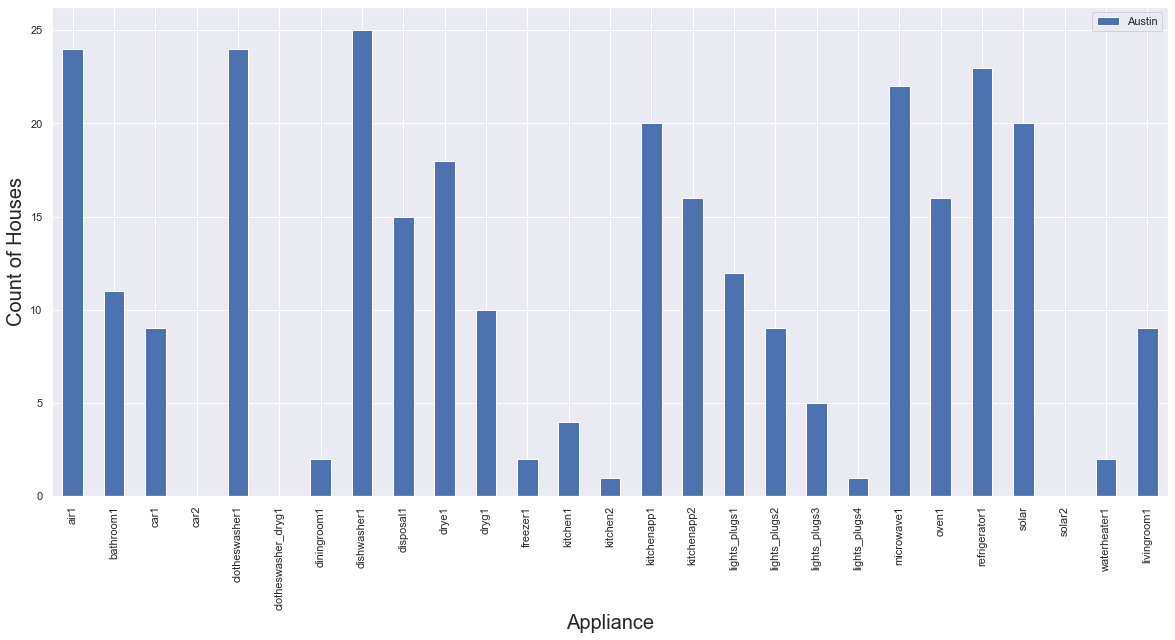

In [23]:
# Create a stacked bar graph from a dataframe
# Set size
sns.set(rc={'figure.figsize':(20,9)})
# Create a temporal dataframe to count how many houses has each appliance
data_appliances_stack = pd.DataFrame({
    "Austin":[len(x) for x in austin_appliances_housesid.values()],
    }, 
    index=list(dict_compare_appliances.keys())
)
# Plot columns excepting grid, leg1v and leg2v
ax = data_appliances_stack[(data_appliances_stack.index != "grid") & (data_appliances_stack.index != "leg1v") & (data_appliances_stack.index != "leg2v")].plot(kind='bar', stacked=True)
ax.set_xlabel("Appliance", fontdict={'fontsize':20})
ax.set_ylabel("Count of Houses", fontdict={'fontsize':20})

In [16]:
def prepare_dataframe_evalation(dataframe):
    """To evaluate the dataframe data

    Args:
        dataframe (DataFrame): Dataframe to be evaluated

    Returns:
        tuple: Two dataframes to be used to evaluate
    """
    # Group by house id and count per column
    df_grouped = dataframe.groupby(["dataid"]).count()
    # Make a copy to preserve original values
    df_grouped_copy = df_grouped.copy()
    # Replace it by 1 when the values count is not zero
    df_grouped[df_grouped > 0] = 1
    # Add sum at the end
    df_grouped['sumRow'] = df_grouped.sum(axis=1)
    # Add sum per column
    df_grouped.loc['sumColumn',:]= df_grouped.sum(axis=0)
    return df_grouped, df_grouped_copy

In [17]:
# Selecting houses and appliances to use
# AUSTIN
# Get the grouped dataframe
df_austin_grouped, df_austin_grouped_ = prepare_dataframe_evalation(df_austin_work)
# Filter those houses that has data from more than 12 appliances
filtered_final_austin = df_austin_grouped[df_austin_grouped["sumRow"] > 12]
# Get the index of those with data in solar panel and car1
index_use_austin = filtered_final_austin[(filtered_final_austin["solar"] > 0) & (filtered_final_austin["car1"] > 0)].index
# Filter the elements based on the obtained index
df_austin_filtered = filtered_final_austin.loc[index_use_austin]
# Check count per column to select which appliance tha could be used
list_appliances_austin = [
    "local_15min",
    "air1",
    "bathroom1",
    "car1",
    "clotheswasher1",
    "dishwasher1",
    "disposal1",
    "drye1",
    "dryg1",
    "kitchenapp1",
    "kitchenapp2",
    "microwave1",
    "oven1",
    "refrigerator1",
    "solar",
    "livingroom1",
    "diningroom1",
    "bathroom1"
] 
df_austin_filtered[list_appliances_austin]

,local_15min,air1,bathroom1,car1,clotheswasher1,dishwasher1,disposal1,drye1,dryg1,kitchenapp1,kitchenapp2,microwave1,oven1,refrigerator1,solar,livingroom1,diningroom1,bathroom1
dataid,,,,,,,,,,,,,,,,,,
661,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1642,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2335,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4373,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
7719,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
8156,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
9278,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
sumColumn,25.0,24.0,11.0,9.0,24.0,25.0,15.0,18.0,10.0,20.0,16.0,22.0,16.0,23.0,20.0,9.0,2.0,11.0


In [18]:
# Get the dataframes considering the columns and houses id found previously
df_austin_final = df_austin_work[df_austin_work["dataid"].isin(index_use_austin)][["dataid"]+list_appliances_austin]

In [19]:
# Show results
print("AUSTIN")
print(len(index_use_austin))
print(index_use_austin)
print(list_appliances_austin)

AUSTIN
8
Index([661, 1642, 2335, 4373, 7719, 8156, 9278, 'sumColumn'], dtype='object', name='dataid')
['local_15min', 'air1', 'bathroom1', 'car1', 'clotheswasher1', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'kitchenapp1', 'kitchenapp2', 'microwave1', 'oven1', 'refrigerator1', 'solar', 'livingroom1', 'diningroom1', 'bathroom1']


In [20]:
# Validation of new buildings
va_austin = df_austin[['dataid']+list_appliances_austin]
# Filter those houses that we think it can work
va_austin = va_austin[va_austin['dataid'].isin(list(index_use_austin)+ [7536, 9160] )]
# Add date columns
va_austin['dateTime'] = pd.to_datetime(va_austin['local_15min'], utc=True).dt.tz_convert('US/Central')
va_austin['year'] = pd.DatetimeIndex(va_austin['dateTime']).year
va_austin['month'] = pd.DatetimeIndex(va_austin['dateTime']).month
va_austin['day'] = pd.DatetimeIndex(va_austin['dateTime']).day
va_austin['hour'] = pd.DatetimeIndex(va_austin['dateTime']).hour
va_austin['minute'] = pd.DatetimeIndex(va_austin['dateTime']).minute